# Finding peaks an vallyes and spacing parameters
Some the the algorithms used in surface metrology requires the identification of peaks and valleys, or at least elements of the profile. This is particularly important for the determination of spacing parameters.  We generate a syntetic profile and we will try to calculate Rsm as definied in the document: 
http://resource.npl.co.uk/softgauges/pdf/Specification.pdf
In fact, there are many definition of the algorithms for identifying the spacing parameters, hence an accurate understading the the various techniques is needed. 
As usual we define a syntethic profile to use for testing the algorithms proposed.

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

In [34]:
x = np.linspace(0,1,100)
Amplitude = 0.3
Frequency = 5
Phase = 0
# We compute the sinusoidal function
y = Amplitude*np.sin(x*2*np.pi*Frequency+Phase)
y[20:30] = y[20:30]*1.5
y[60:70] = y[60:70]*2

In [35]:
 x2 = np.linspace(0,1,100)
Amplitude2 = 0.1
Frequency2 = 10
Phase2 = 0
# We compute the sinusoidal function
y2 = Amplitude2*np.sin(x2*2*np.pi*Frequency2+Phase2)

In [36]:
x2 = np.linspace(0,1,100)
Amplitude3 = 0.1
Frequency3 = 20
Phase2 = 0
# We compute the sinusoidal function
y3 = Amplitude3*np.sin(x2*2*np.pi*Frequency3+Phase2)
final = y2+y+y3
final = final - np.mean(final)

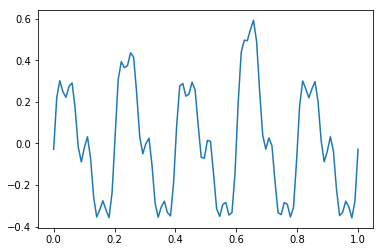

In [37]:
plt.plot(x2,final)

The final profile can be characherized with the amplituted parameters Pt (for the evaluation lenght).

In [42]:
Pt = abs(max(final)) + abs(min(final))
print(Pt)

0.9507161743010359


The approach used for determining the spacing parameters is in fact no based on the evaluation of the peaks  but reather on the evaluation of the up and down crossing. 
We first test this concept using the mean line as a reference line. We have an up crossing when the value is higher than the mean line and the previous value, and a down crossing when the value is lower than the mean line and the 

In [46]:
downcross = []
upcross = []
profilemean = np.mean(final)
for i,curr_val in enumerate(final[1:-1]):
    if final[i]< profilemean and curr_val >= profilemean: # final[i] is the previous value 
        upcross.append(i+1) # plus one is for getting the right indexes (we start from the second values)
    if final[i]> profilemean and curr_val <= profilemean:
        downcross.append(i+1)
       

We can easily plot

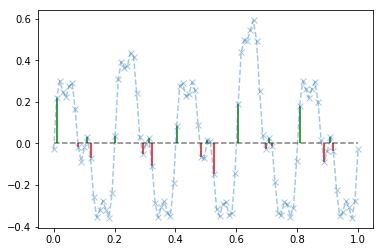

In [48]:
plt.plot(x2,final,marker='x',linestyle='--',alpha=0.4)
plt.vlines(x2[downcross],0,final[downcross],color='red')
plt.vlines(x2[upcross],0,final[upcross],color='green')
plt.hlines(0,-0,1,linestyle='--',alpha=.5)